# 챕터 16 실습 코드들 

챕터 16의 실습에 필요한 코드 예제를 구글 코랩에서 여시려면 [링크](https://colab.research.google.com/drive/1E5grqFiKVjXcet1sVwm2eVpCcbL08Tbk?usp=sharing)를 클릭하시거나 아래의 주소를 웹브라우저에 복사해 주세요. 

실습 코드 링크: https://colab.research.google.com/drive/1E5grqFiKVjXcet1sVwm2eVpCcbL08Tbk?usp=sharing

### [코드 16.2.1-1: 실습에 필요한 모듈 불러오기] 

In [ ]:
# 필요한 모듈 불러오기 
import pandas as pd
import random 
import datetime as dt 
import random
import re

# 시각화에 필요한 모듈 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 진행율을 표시하기 위한 모듈
from tqdm import tqdm
tqdm.pandas()

### [코드 예제 16.2.1-2: 실습 데이터 불러오기] 

In [ ]:
# 데이터 불러오기 
raw1 = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH16-raw_data.txt", sep="\t")
print("데이터는 총 {}행과 {}열로 구성되어 있습니다.".format(*raw1.shape))
raw1.head() # 첫 다섯행 출력 

데이터는 총 645행과 6열로 구성되어 있습니다.


,id,date,newsorgs,title,keywords,maintext
0,1.100401e+06,20201128,동아일보,[사설]미국 편 서지 말라 압박하며 한한령 쥐고 흔드는 중국,"미국,압박,한한령,중국,중국,외교,부장,3일,방한,귀국,부장,일정,한국,대통령,국회...",왕이 중국 외교부장이 어제 2박 3일의 방한을 마치고 귀국했다. 왕 부장은 짧은 일...
1,1.100101e+06,20201123,경향신문,"[사설]구글의 수수료 전격 유예, ‘갑질 방지법’ 회피 꼼수 안 된다","구글,유예,수수료,전격,갑질,방지법,회피,꼼수,구글,신규,응용프로그램,자사,장터,구...",구글이 23일 신규 앱(응용프로그램)에 대해 무조건 자사 장터(구글플레이) 안에서 ...
2,1.100611e+06,20201014,서울신문,"[사설] 中 언론 네티즌, BTS 발언 생트집 도 넘었다","언론,네티즌,생트집,BTS,발언,애국주의,BTS,비난,기품,배려심,신뢰,한국,미국,...",한국과 미국 양국이 함께 겪었던 한국전쟁이라는 고난의 역사를 언급한 방탄소년단(BT...
3,1.100611e+06,20201007,서울신문,"[사설] BTS 병역특례, 형평성 공정성 해쳐선 안 돼","BTS,병역,특례,형평성,공정성,한국,대중음악,케이팝,신화,방탄소년단,BTS,병역특...",한국 대중음악(케이팝)의 신화를 쓰고 있는 방탄소년단(BTS)의 병역특례 문제가 또...
4,1.101101e+06,20201006,한국일보,"[한국일보 사설] BTS 병역특례 논란, 공론화로 풀자","논란,BTS,병역,특례,공론화,풀자,최고위원,노웅래,더불어민주당,최고,위원,K팝,역...",노웅래 더불어민주당 최고위원이 K팝의 역사를 새로 쓰고 있는 방탄소년단(BTS)에 ...


### [코드 예제 16.2.3-1: 텍스트 원글] 

In [ ]:
 raw1['maintext'][7]

'보이그룹 방탄소년단(BTS)이 지난달 31일 미국을 대표하는 노래 인기 순위 집계 차트 빌보드 ‘핫 100’에서 1위를 차지했다. 2012년 싸이가 ‘강남스타일’로 2위를 한 적은 있지만 한국 가수가 정상에 오르기는 처음이다. 세계 대중음악의 지표로 불리는 60여년 핫 100 역사를 되짚어봐도 보이그룹이 1위를 한 것은 지금까지 뉴키즈온더블록 등 세 그..'

### [코드 예제 16.2.3-2: 특수기호 제거]

In [ ]:
# 변환 하고자하는 문자들 입력 
pattern1 = '[-=+,#/\?:;^$.A*"~%!\\\n\r\t▼♣§☆♡´∀｀ﾉ♥▲�▶＊━“”‘’()]'

# 문자 변환 
text = re.sub(pattern1, ' ', raw1['maintext'][7]).strip()
print(text)

보이그룹 방탄소년단 BTS 이 지난달 31일 미국을 대표하는 노래 인기 순위 집계 차트 빌보드  핫 100 에서 1위를 차지했다  2012년 싸이가  강남스타일 로 2위를 한 적은 있지만 한국 가수가 정상에 오르기는 처음이다  세계 대중음악의 지표로 불리는 60여년 핫 100 역사를 되짚어봐도 보이그룹이 1위를 한 것은 지금까지 뉴키즈온더블록 등 세 그


### [코드 예제 16.2.3-3: strip() 실행 예제] 

In [ ]:
"   파이썬을 사용하면 인공지능을 쉽게 개발 할 수 있습니다.    ".strip()

'파이썬을 사용하면 인공지능을 쉽게 개발 할 수 있습니다.'

### [코드 예제 16.2.3-4: 전체 데이터 특수 기호 제거] 

In [ ]:
# 전체 텍스트에 적용 
raw1['maintext'] = raw1['maintext'].progress_map(lambda x:re.sub(pattern1, ' ', x).strip())  # 특수 기호를 " " 공란으로 

100%|██████████| 645/645 [00:00<00:00, 99768.63it/s]


### [코드 예제 16.2.4.-1: PyKomoran 설치] 

In [ ]:
# 전처리를 위해 형태소 분석기 설치 
!pip install PyKomoran 

     |████████████████████████████████| 6.4 MB 3.8 MB/s 
     |████████████████████████████████| 198 kB 51.2 MB/s 


### [코드 예제 16.2.4.-2: PyKomoran 사용 준비] 

In [ ]:
# 형태소분석기 불러오기 
from PyKomoran import *

# 코모란을 사용하기 위한 객체 만들기 
komoran = Komoran("EXP") 

### [코드 예제 16.2.4..1-3: .get_list()를 사용한 형태소 분석 결과] 

In [ ]:
komoran.get_list("올해 해외여행을 하는 중국인은 지난해보다 5% 이상 늘어나 5000만 명이 넘을 것으로 전망된다.")

[올해/NNG,
 해외여행/NNG,
 을/JKO,
 하/VV,
 는/ETM,
 중국인/NNG,
 은/JX,
 지난해/NNG,
 보다/JKB,
 5/SN,
 %/SW,
 이상/NNG,
 늘어나/VV,
 아/EC,
 5000/SN,
 만/NR,
 명/NNB,
 이/JKS,
 넘/VV,
 을/ETM,
 것/NNB,
 으로/JKB,
 전망/NNG,
 되/XSV,
 ㄴ다/EF,
 ./SF]

### [코드 예제 16.2.4.1-4: .get_morphes_by_tags()를 사용한 형태소 분석 결과] 

In [ ]:
komoran.get_morphes_by_tags("올해 해외여행을 하는 중국인은 지난해보다 5% 이상 늘어나 5000만 명이 넘을 것으로 전망된다.",
                            tag_list=['NNP', 'NNG']) ## NNP / NNG 

['올해', '해외여행', '중국인', '지난해', '이상', '전망']

### [코드 예제 16.2.4.1-5: get_nouns()를 사용한 형태소 분석 결과] 

In [ ]:
komoran.get_nouns("올해 해외여행을 하는 중국인은 지난해보다 5% 이상 늘어나 5000만 명이 넘을 것으로 전망된다.")

['올해', '해외여행', '중국인', '지난해', '이상', '전망']

### [코드 예제 16.2.4.1-6: 전체 데이터 형태소 분석[ 

In [ ]:
raw1['tokens'] = raw1['maintext'].progress_map(lambda x:komoran.get_nouns(x))

100%|██████████| 645/645 [00:06<00:00, 93.11it/s] 


## 토모토파이(Tomotopy)를 사용한 토픽 모델링 실습 

### [코드 예제: 16.3.1-1: tomotopy 설치]

In [ ]:
!pip install tomotopy
import tomotopy as tp

     |████████████████████████████████| 16.3 MB 5.6 MB/s 


### [코드 예제 16.3.2.1: 모델 설정] 

In [ ]:
mdl = tp.LDAModel(k=5, seed=830731)

### [코드 예제 16.3.2.2-1: 실습에서 사용하는 문서의 형태]

In [ ]:
raw1['keywords'].head()

0    미국,압박,한한령,중국,중국,외교,부장,3일,방한,귀국,부장,일정,한국,대통령,국회...
1    구글,유예,수수료,전격,갑질,방지법,회피,꼼수,구글,신규,응용프로그램,자사,장터,구...
2    언론,네티즌,생트집,BTS,발언,애국주의,BTS,비난,기품,배려심,신뢰,한국,미국,...
3    BTS,병역,특례,형평성,공정성,한국,대중음악,케이팝,신화,방탄소년단,BTS,병역특...
4    논란,BTS,병역,특례,공론화,풀자,최고위원,노웅래,더불어민주당,최고,위원,K팝,역...
Name: keywords, dtype: object

### [코드 예제 16.3.2.2-2: 토모토파이 모델에 문서 추가하기]

In [ ]:
for n, line in enumerate(raw1['keywords']):
    mdl.add_doc(line.strip().split(","))

### [코드 예제 16.3.2.3-1: 토픽 모델 학습] 

In [ ]:
for i in range(0, 100, 1):
    mdl.train(10)
    print('반복: {}\t로그-우도: {}'.format(i*10, mdl.ll_per_word))

반복: 0	로그-우도: -9.277511566911812
반복: 10	로그-우도: -9.089091349636636
반복: 20	로그-우도: -9.012798912205822
반복: 30	로그-우도: -8.960405465021339
반복: 40	로그-우도: -8.93644955502104
반복: 50	로그-우도: -8.915486233641927
반복: 60	로그-우도: -8.903396403867964
반복: 70	로그-우도: -8.889506775268408
반복: 80	로그-우도: -8.880843176312268
반복: 90	로그-우도: -8.8731005947434
반복: 100	로그-우도: -8.86563107127417
반복: 110	로그-우도: -8.863742284026362
반복: 120	로그-우도: -8.860175798723544
반복: 130	로그-우도: -8.862562826143785
반복: 140	로그-우도: -8.855510572798108
반복: 150	로그-우도: -8.853073569156223
반복: 160	로그-우도: -8.847936579703282
반복: 170	로그-우도: -8.845371198859883
반복: 180	로그-우도: -8.846235060534731
반복: 190	로그-우도: -8.838818303806583
반복: 200	로그-우도: -8.841509483069887
반복: 210	로그-우도: -8.837174525242395
반복: 220	로그-우도: -8.841580212369308
반복: 230	로그-우도: -8.83706684180153
반복: 240	로그-우도: -8.838218607171337
반복: 250	로그-우도: -8.83199680546207
반복: 260	로그-우도: -8.83458348360695
반복: 270	로그-우도: -8.830226254779843
반복: 280	로그-우도: -8.835810903078356
반복: 290	로그-우도: -8.83784394005961

### [코드 예제 16.3.2.4-1: 학습된 토픽 모델 토픽 별 정보 출력] 

In [ ]:
for k in range(mdl.k):
    print('토픽 #{}에 가장 많이 등장한 단어들'.format(k))
    print(mdl.get_topic_words(k, top_n=5))

토픽 #0에 가장 많이 등장한 단어들
[('한글', 0.007327177096158266), ('환자', 0.0070219035260379314), ('의료', 0.006716629955917597), ('불법', 0.005800809245556593), ('사건', 0.0053123715333640575)]
토픽 #1에 가장 많이 등장한 단어들
[('한국', 0.031534090638160706), ('영화', 0.018307475373148918), ('관광', 0.015460687689483166), ('관광객', 0.015329296700656414), ('한류', 0.014672346413135529)]
토픽 #2에 가장 많이 등장한 단어들
[('경제', 0.012334463186562061), ('세계', 0.012220609933137894), ('국민', 0.009374282322824001), ('국가', 0.007818290032446384), ('문화', 0.007666486315429211)]
토픽 #3에 가장 많이 등장한 단어들
[('한류', 0.02041822485625744), ('문화', 0.019346579909324646), ('방송', 0.013762743212282658), ('드라마', 0.013480731286108494), ('콘텐츠', 0.009532565250992775)]
토픽 #4에 가장 많이 등장한 단어들
[('중국', 0.05212818831205368), ('한국', 0.026701759546995163), ('일본', 0.026665331795811653), ('사드', 0.018359849229454994), ('정부', 0.01668418198823929)]


### [코드 예제 16.3.2.4-2: 학습된 토픽 모델 결과 출력] 

In [ ]:
mdl.summary()

<Basic Info>
| LDAModel (current version: 0.12.2)
| 645 docs, 109874 words
| Total Vocabs: 17375, Used Vocabs: 17375
| Entropy of words: 8.29385
| Entropy of term-weighted words: 8.29385
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -8.82649
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 5 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 830731 (random seed)
| trained in version 0.12.2
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.37451372 0

## 16.4. 최적의 K값 찾기

### [코드 예제 16.4-1: 학습된 모델의 혼란도 구하기] 

In [ ]:
mdl.perplexity

6812.340441833215

### [코드 예제 16.4.1-1: 반복된 작업을 위해 LDA 모델 함수 지정하기] 

In [ ]:
# 학습 준비 

# K값 후보 정하기 
k_list = list(range(2,21, 1))

# 혼란도를 저장하기 위한 빈 딕셔너리 만들기 
perplexity_scores = {}  

# 학습  
for k in k_list:
    
    #모델 학습
    model = lda(raw1['keywords'], k, 1000, 10)

    # 혼란도값 저장 
    perplexity_scores[k]=model.perplexity 

문서 개수: 645 , 단어 개수: 17365 , 단어의 총수: 101018
제거된 단어들: ['한국', '중국', '한류', '일본', '정부', '세계', '문화', '사드', '미국', '대통령']
훈련 중...
반복: 0	로그-우도: -9.373654490415584
반복: 10	로그-우도: -9.2808065785965
반복: 20	로그-우도: -9.250101989200973
반복: 30	로그-우도: -9.234420196832415
반복: 40	로그-우도: -9.221078954293795
반복: 50	로그-우도: -9.214133080577485
반복: 60	로그-우도: -9.207799771522692
반복: 70	로그-우도: -9.205860474332967
반복: 80	로그-우도: -9.201307285131504
반복: 90	로그-우도: -9.197202205506908
반복: 100	로그-우도: -9.185840936475701
반복: 110	로그-우도: -9.187061957847542
반복: 120	로그-우도: -9.18835255172336
반복: 130	로그-우도: -9.182844662047547
반복: 140	로그-우도: -9.183086669373834
반복: 150	로그-우도: -9.1839429662777
반복: 160	로그-우도: -9.180355250377549
반복: 170	로그-우도: -9.18122788744328
반복: 180	로그-우도: -9.177987092093957
반복: 190	로그-우도: -9.180251444511313
반복: 200	로그-우도: -9.180789525965242
반복: 210	로그-우도: -9.17539071396561
반복: 220	로그-우도: -9.175102925339806
반복: 230	로그-우도: -9.177461981901379
반복: 240	로그-우도: -9.1762562935909
반복: 250	로그-우도: -9.173753267954819
반복: 260	로그-우도:

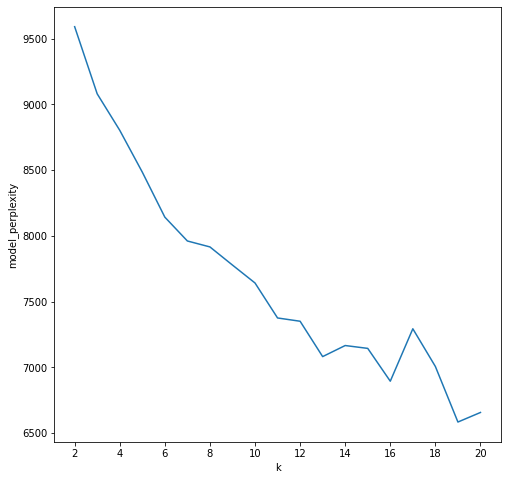

In [ ]:
# 혼란도 값을 데이터 프레임화 
perplexity_df = pd.DataFrame.from_dict(perplexity_scores, orient='index', columns=['model_perplexity']) # 데이터 프레임화 
perplexity_df['k']=perplexity_df.index # k값을 데이터화 하기

# 이미지 시각화 준비 
fig, ((ax1))= plt.subplots(nrows=1, ncols=1)  
fig.set_size_inches(8,8) 

# 시각화 
g = sns.lineplot(x="k", y="model_perplexity", data=perplexity_df, ax=ax1) 
g.set_xticks([2,4, 6, 8, 10, 12, 14, 16, 18, 20]) # x축 표시

##	16.5 토픽 모델링 결과 탐색 

### [코드 예제 16.5-1: 최적 토픽 모델 학습] 

In [ ]:
model = lda(raw1['keywords'], 13, 1000, 10)

문서 개수: 645 , 단어 개수: 17365 , 단어의 총수: 101018
제거된 단어들: ['한국', '중국', '한류', '일본', '정부', '세계', '문화', '사드', '미국', '대통령']
훈련 중...
반복: 0	로그-우도: -9.614820964687965
반복: 10	로그-우도: -9.349612689993704
반복: 20	로그-우도: -9.243395280166784
반복: 30	로그-우도: -9.175286874554173
반복: 40	로그-우도: -9.14116739017164
반복: 50	로그-우도: -9.104671360811073
반복: 60	로그-우도: -9.079072930468536
반복: 70	로그-우도: -9.067176918741401
반복: 80	로그-우도: -9.051168751343944
반복: 90	로그-우도: -9.041275787771028
반복: 100	로그-우도: -9.02208402097696
반복: 110	로그-우도: -9.020891936232854
반복: 120	로그-우도: -9.017779091321126
반복: 130	로그-우도: -9.008732469726285
반복: 140	로그-우도: -9.002546632686865
반복: 150	로그-우도: -8.994402769209193
반복: 160	로그-우도: -8.98514632995067
반복: 170	로그-우도: -8.983351276378338
반복: 180	로그-우도: -8.97809375036198
반복: 190	로그-우도: -8.973448946210276
반복: 200	로그-우도: -8.970061574903244
반복: 210	로그-우도: -8.9625109182287
반복: 220	로그-우도: -8.957767954422527
반복: 230	로그-우도: -8.954652602611768
반복: 240	로그-우도: -8.951788872497504
반복: 250	로그-우도: -8.949555026466545
반복: 260	로그-

### [코드 예제 16.5.1-1: 각 토픽 별 가장 빈번한 토픽 출력하기] 

In [ ]:
# 토픽 
topic_wf_df = pd.DataFrame()
for i in range(0, 13):
  temp = pd.DataFrame()

  # 단어 및 확률 
  temp = pd.DataFrame(model.get_topic_words(i, top_n=10))
  temp.columns = ["Topic"+str(i+1),"probs"+str(i+1)]
  temp = temp.reset_index()

  # 기존의 데이터프레임과 합치기 
  if (i==0):
      topic_wf_df = topic_wf_df.append(temp, ignore_index=True)
  else:
      topic_wf_df = topic_wf_df.merge(temp, left_on="index", right_on="index")

topic_wf_df

,index,Topic1,probs1,Topic2,probs2,Topic3,probs3,Topic4,probs4,Topic5,probs5,Topic6,probs6,Topic7,probs7,Topic8,probs8,Topic9,probs9,Topic10,probs10,Topic11,probs11,Topic12,probs12,Topic13,probs13
0,0,관광,0.043776,국가,0.012772,경제,0.025391,올림픽,0.023619,드라마,0.015760,한글,0.028167,한국인,0.012187,영화,0.094003,연예인,0.013051,양국,0.032115,배치,0.028655,국민,0.025845,방송,0.035020
1,1,관광객,0.043160,나라,0.009626,산업,0.021276,대회,0.015679,공연,0.013942,한국어,0.014789,여성,0.009818,감독,0.030394,수사,0.008701,정상,0.016708,보복,0.018083,정치,0.019044,드라마,0.023897
2,2,의료,0.026020,중요,0.008312,시장,0.018767,대한민국,0.013439,열풍,0.012729,교육,0.013615,시위,0.009649,영화제,0.019085,연예,0.008561,협력,0.014307,북한,0.017589,국회,0.018194,문학,0.023279
3,3,외국인,0.023183,지원,0.007091,아세안,0.017162,월드컵,0.013032,가수,0.012275,언어,0.009860,보도,0.007956,수상,0.016258,의혹,0.008280,교류,0.013907,외교,0.016107,경제,0.013433,지상파,0.017923
4,4,중국인,0.015908,국민,0.006856,수출,0.016459,국민,0.011200,BTS,0.011063,유학,0.009391,불법,0.007956,관객,0.015787,방송,0.008140,외교,0.013807,조치,0.015020,대표,0.009013,콘텐츠,0.017511
5,5,환자,0.014182,시대,0.006856,기업,0.015054,스포츠,0.010182,유럽,0.010154,우리말,0.008921,경찰,0.007956,기생충,0.013902,출연,0.007859,총리,0.011606,미사일,0.010079,국정,0.008673,제작,0.011537
6,6,유치,0.012332,정도,0.006574,달러,0.014954,평창,0.008960,케이팝,0.010154,사회,0.008921,언론,0.007787,한국영화,0.012960,사건,0.007438,독도,0.010005,결정,0.009289,대한민국,0.008503,미디어,0.011125
7,7,서울,0.010729,지역,0.006480,규제,0.012947,역사,0.007942,음악,0.009851,지원,0.008686,현지,0.007279,작품,0.009662,재단,0.006456,갈등,0.009905,반대,0.008696,후보,0.007313,소설,0.010713
8,8,병원,0.010606,상황,0.006386,FTA,0.012244,경기,0.007739,콘텐츠,0.009851,민족,0.008217,홍콩,0.007110,할리우드,0.008955,대사,0.006316,방문,0.009705,위협,0.008696,사회,0.006973,방송사,0.010507
9,9,성형,0.008510,의미,0.006246,투자,0.010839,선수,0.007535,노래,0.009699,대학,0.007982,인터넷,0.006941,배우,0.008248,사장,0.006316,정치,0.009605,압박,0.007906,대선,0.006292,종편,0.009889


### [코드 예제 16.5.2-1: 토픽 모델 속 각 문서 별 토픽 분포 확률 구하기]

In [ ]:
# 빈 데이터프레임 
theta_df = pd.DataFrame()

# 문서별 토픽 확률 
for i, line in enumerate(model.docs):
    temp=pd.DataFrame(line.get_topic_dist())
    theta_df=theta_df.append(temp.T)
    
# 데이터 정리 
print('데이터 프레임은 {}행과 {}열로 이루어져 있습니다\n'.format(*theta_df.shape))
theta_df = theta_df.reset_index()
theta_df = theta_df.drop(['index'], axis=1)
theta_df.columns = ['Topic'+ str(x) for x in range(1,14)]

# 데이터 프레임 출력
theta_df

데이터 프레임은 645행과 13열로 이루어져 있습니다



,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.001206,0.193174,0.061940,0.000841,0.001452,0.000901,0.001403,0.000732,0.016445,0.106399,0.546607,0.053338,0.015563
1,0.000897,0.216032,0.257246,0.000626,0.334455,0.006227,0.001044,0.000545,0.078916,0.001417,0.079084,0.011925,0.011585
2,0.006956,0.131041,0.013766,0.024630,0.168852,0.036656,0.001126,0.036520,0.025172,0.193170,0.330782,0.024831,0.006498
3,0.001016,0.206828,0.001878,0.371829,0.152188,0.038500,0.064084,0.006907,0.039019,0.001605,0.089530,0.026080,0.000535
4,0.013511,0.293047,0.001867,0.344501,0.113732,0.000755,0.013677,0.000613,0.082531,0.014096,0.082720,0.038419,0.000532
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.001324,0.499115,0.109025,0.000923,0.321325,0.000990,0.001541,0.033596,0.018062,0.002091,0.010111,0.001198,0.000697
641,0.017158,0.229255,0.161128,0.000894,0.390501,0.000958,0.009430,0.056343,0.096868,0.033777,0.001853,0.001160,0.000675
642,0.018167,0.360411,0.094964,0.009351,0.312617,0.001015,0.001580,0.000824,0.085757,0.086193,0.001961,0.018038,0.009120
643,0.001252,0.169649,0.242666,0.008626,0.110054,0.000936,0.001457,0.372917,0.086861,0.001978,0.001809,0.001133,0.000659


### [코드 예제 16.5.2-2: 문서 별 가장 확률이 높은 토픽 구하기]

In [ ]:
# 확률 높은 토픽 반환 
theta_df['Highest_Topic']=theta_df[['Topic'+ str(s) for s in range(1, 14)]].idxmax(axis=1)
theta_df['Highest_Topic'].head(10) 

0    Topic11
1     Topic5
2    Topic11
3     Topic4
4     Topic4
5     Topic5
6     Topic5
7     Topic5
8     Topic5
9    Topic11
Name: Highest_Topic, dtype: object

### [코드 예제 16.5.2-3: 토픽 별 개수 확인] 

In [ ]:
# 토픽 별 개수 구하기 
print(theta_df['Highest_Topic'].value_counts())

Topic11    78
Topic2     71
Topic1     71
Topic10    62
Topic3     52
Topic9     49
Topic13    48
Topic5     44
Topic8     35
Topic6     35
Topic7     35
Topic12    33
Topic4     32
Name: Highest_Topic, dtype: int64


### [코드 예제 16.5.3-1: 원 데이터와 문서 별 토픽 분포 데이터 합치기] 

In [ ]:
# 데이터프레임 합치기 
data = pd.merge(raw1, theta_df, left_index=True, right_index=True)

### [코드 예제 16.5.3-2: 토픽 11에 포함될 확률이 가장 높은 문서들 살펴보기] 

In [ ]:
# 출력하려는 토픽 선택 
i = 11

# 토픽 빈출 단어 및 토픽에 해당되는 문서 출력 
print("토픽",i,"에 가장 빈번히 나오는 단어들\n")
print(topic_wf_df['Topic'+str(i)]) 
print("해당 토픽에 포함된 문서")
data[data['Highest_Topic']=='Topic'+str(i)][['maintext','Topic'+str(i)]].sample(n=3).\
  sort_values(by='Topic'+str(i), ascending=False)['maintext'].values 

토픽 11 에 가장 빈번히 나오는 단어들

0     배치
1     보복
2     북한
3     외교
4     조치
5    미사일
6     결정
7     반대
8     위협
9     압박
Name: Topic11, dtype: object
해당 토픽에 포함된 문서


array(['중국이 어제 북한의 탄도미사일 발사에 사실상 침묵했다. 신화통신 등 중국 매체들이 올해 처음이자 트럼프 행정부 출범 이후 북한의 첫 미사일 발사라며 짤막하게 보도했을 뿐이다. 북한 도발을 주요 뉴스로 다룬 세계 언론과는 현격하게 달랐다. \n \n중국이 자국의 이익에 따라 이율배반적인 행동을 취한 것은 이번뿐이 아니다. 북한의 핵 미사일 실험은 한국에 직접..',
       '고고도미사일방어체계인 사드(THAAD)의 한반도 배치 결정에 대한 중국 측 반발과 공세가 점점 심해지고 있다. 중국은 이미 저강도 보복 카드를 꺼내든 것으로 보인다. 대구 치맥페스티벌에 참가하려던 중국 대표단 규모가 대폭 줄었고, 중국 블로거들의 강원도 방문 계획이 돌연 연기됐기 때문이다. 한류 문화 콘텐츠에 대한 중국의 보복 움직임도 가시화될 조짐을 ..',
       '시진핑 중국 국가주석이 지난 17일 다보스포럼 기조연설에서 자유무역과 세계화를 주창했다가 국제사회의 비웃음을 샀다. 시 주석은 “보호무역은 어두운 방에 자신을 가두는 꼴”이라며 “전 세계가 보호주의에 ‘노’라고 말해야 한다”고 했다. “어두운 방 밖에는 바람이 불고 비가 내릴 수 있지만 빛이 있고 공기가 있다”고도 했다. 미국의 도널드 트럼프 대통령 당..',
       '중국 정부가 최근 중국에 진출한 롯데그룹 전 사업장에 대해 동시다발적인 세무 소방 위생 조사를 벌이는 이례적 조치로 사드(THAAD 고고도미사일방어체계) 보복이 아니냐는 의혹을 낳고 있다. 중국은 롯데그룹 상하이 본부를 비롯해 중국 내 150여 개 롯데 점포와 사업장에 대해 고강도 조사를 실시 중이다. 중국의 조치는 롯데가 지난달 경북 성주골프장을 사드..',
       '한 미 군당국이 지난 6일 밤 발사대 2기를 포함한 고고도미사일방어(사드 THAAD) 체계 일부를 경기도 오산 공군기지로 들여왔다. 사드의 한반도 배치 시작을 의미한다. X-밴드 레이더, 요격미사일, 발사통제장치 등 나머지 사드 체계도 곧 반입된다. 이르면 오는

### [코드 예제 16.5.3-3: 토픽 1에 포함될 확률이 가장 높은 문서들 살펴보기] 

In [ ]:
# 출력하려는 토픽 선택 
i = 1

# 토픽 빈출 단어 및 토픽에 해당되는 문서 출력 
print("토픽",i,"에 가장 빈번히 나오는 단어들\n")
print(topic_wf_df['Topic'+str(i)]) 
print("해당 토픽에 포함된 문서")
data[data['Highest_Topic']=='Topic'+str(i)][['maintext','Topic'+str(i)]].sample(n=10).\
  sort_values(by='Topic'+str(i), ascending=False)['maintext'].values 

토픽 1 에 가장 빈번히 나오는 단어들

0     관광
1    관광객
2     의료
3    외국인
4    중국인
5     환자
6     유치
7     서울
8     병원
9     성형
Name: Topic1, dtype: object
해당 토픽에 포함된 문서


array(['서울 강남의 한 성형외과에서 눈 코 지방이식 등 수술을 받던 중국인 여성이 뇌사 상태에 빠졌다. 사고가 일어난 뒤 중국의 인터넷 포털 바이두에는 “한국 성형외과를 못 믿겠다” “한국은 환자를 돈벌이 대상으로 본다”는 비난이 쏟아지고 있다. 정부가 경제혁신 3개년 계획 중 하나로 강조한 보건 의료 산업의 육성과 외국인 환자 유치에 빨간불이 켜졌다. \n \n..',
       '중국인 관광객을 대상으로 한 덤핑관광이 물의를 빚고 있어 대책 마련이 시급하다. 우리나라를 찾는 외국인관광객중 중국인이 차지하는 비중이 지난해 처음으로 미국인을 제치고 2위로 부상했다. 더구나 월드컵과 한류(韓流) 열풍으로 중국인 단체관광객이 대거 내한하고 있으나 이들에게 쇼핑과정에서 바가지를 씌우는 등 한국관광 이미지를 크게 흐려놓고 있는 실정이다.국..',
       '올해 해외여행을 하는 중국인은 지난해보다 5% 이상 늘어나 5000만 명이 넘을 것으로 전망된다. 작년 글로벌 경기침체에도 중국인의 해외여행은 전년보다 4% 늘어났고 씀씀이는 16% 증가했다. 중국인 관광객은 한국에서도 ‘큰손’이다. 올봄 서울을 찾은 중국인의 평균 지출액은 2203달러로 일본인의 1229달러를 크게 웃돌았다. 5월 말까지 중국인 관광객..',
       '요우커(遊客 중국 관광객)가 서울을 비롯해 전 세계 주요 도시와 관광지를 휘젓는 시대가 됐다. 지난해 남한 인구를 웃도는 5400만 명이 해외를 돌아다녔다. 2020년엔 1억 명을 돌파할 것으로 추정한다. 이 중 10%만 국내로 와도 1000만 명이다. 현재 이들의 1인당 평균 씀씀이를 2000달러로 추산하면 200억 달러(약 23조원)는 거뜬히 번다는..',
       '올해 우리나라를 찾는 외래 관광객이 곧 1000만명을 넘어선다고 한다. 지난 2002년 500만명대의 관광객이 10년 만에 갑절로 늘어난 것이다. 양적으로 비약적인 성장세이고 한국이 국제적인 관광 목적지 대열에 합류하게 됐음을 의미한다. 아울러 관광산업의 질적 

### [코드 예제 16.5.4-1: 날짜를 사용하여 연도 추출하기] 

In [ ]:
# 날자 변인을 연도 변인으로 
data['date_new'] = data['date'].astype("str") #데이터 형식을 문자열로 
data['date_new'] = data['date_new'].apply(lambda x: dt.datetime.strptime(x,'%Y%m%d')) # 시간 데이터로 바꾸기
data['year'] = data['date_new'].dt.year


### [코드 예제 16.5.4-2: 연도 별 토픽 변화 시각화] 

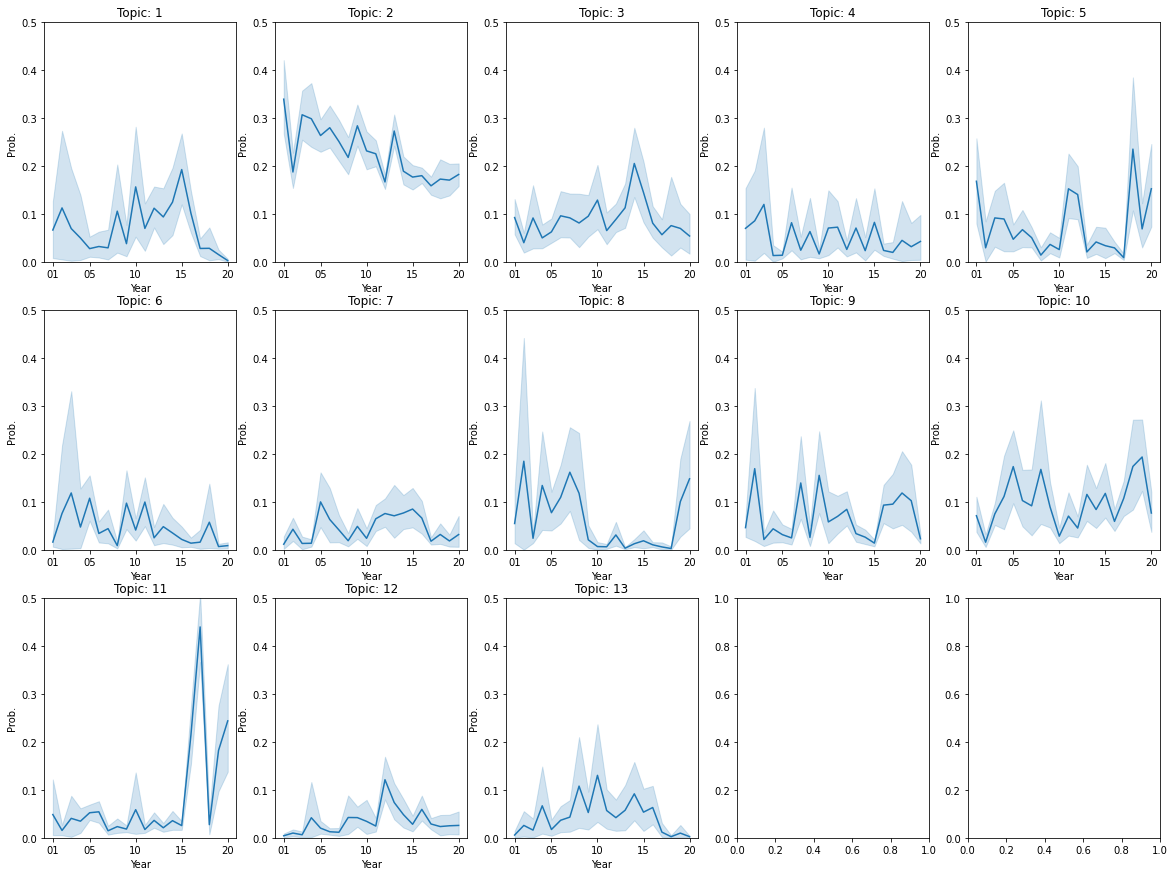

In [ ]:
# 캔버스 설정 
figure, axs = plt.subplots(ncols=5, nrows=3) 
figure.set_size_inches(20,15) 

# 출력할 토픽 선택
topic = ['Topic'+str(t) for t in range(1, 14)]

# 시각화 
for k, ax in enumerate(['ax'+str(x) for x in range(1, 14)]):
  t = topic[k]
  ax = sns.lineplot(x='year',y=data[t], data=data, ax=axs[k//5, k%5]) 
  ax.set(ylim=(0, .5))
  ax.set_xticks([2001, 2005, 2010, 2015, 2020])
  ax.set_xticklabels(['01', '05', '10', '15', '20'])
  # 데이터 정보 표시 
  ax.set(title='Topic: {}'.format(k+1), xlabel="Year", ylabel="Prob.")